# Plane wave decomposition Example

## Purpose

This notebook shows how to simulate in python how electromagnetic waves propagates from a nearfield signal to farfield



In [2]:
import numpy as np
import cmath
import matplotlib.pyplot as plt

%matplotlib inline

### Creating an unit impulse nearfield signal located in x=0, 

In [3]:
u = 1       # length unit, e.g. 1 µm
wlen = u    # wavelength in unit of u
N=1001      # number of points
x = np.linspace(-5,5,N)*u
sig = np.zeros(N) 
sig[500]=1

### Array of spatial frequencies centered on 0, several options:

In [4]:
kx=np.zeros(N,dtype=complex)
freq_array1=np.linspace(-(N-1)/2,(N-1)/2,N)       # possible spatial freq. in the signal (no need of x)
freq_array2=freq_array1/(np.max(x)-np.min(x));    # spatial freq. in x unit
kx=2*np.pi*freq_array2;                           # angular spatial freq in rad/x_unit  (kx)
freq=kx;                                          #<= frquency choice in absica

### FFT computation, several options (idem in matlab)

In [5]:
# 1) Simplest expression: the spectrum have 0th freq at first point
#   can't be used here later on, cause we have centered our freq in middle 
#TF=np.fft.fft(sig) # 
#SIG =np.fft.ifft(TF)

# 2) More common expression: the spectrum have 0th freq in middle
#TF=np.fft.fftshift(np.fft.fft(sig)) 
#SIG =np.fft.ifft(np.fft.ifftshift(TF))

#3) like 2) but phase Origin @center, (not @left as both 2 above)
TF=np.fft.fftshift(np.fft.fft(np.fft.ifftshift(sig)))
SIG=np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(TF)))


### Plot signal and angular spectrum in nearfield plane

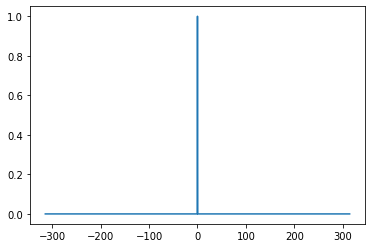

In [6]:

plt.plot(freq,sig)



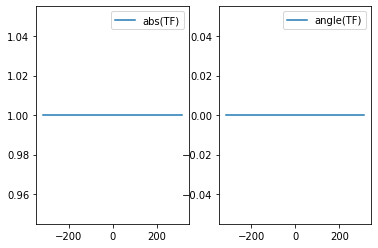

In [7]:
plt.subplot(1,2,1)
plt.plot(freq,np.abs(TF),label='abs(TF)')
plt.legend()
plt.subplot(1,2,2)
plt.plot(freq,np.angle(TF),label='angle(TF)')
plt.legend()

In [8]:

1j

1j

### Definition for propagation function H=exp(ikz*z) & propagation

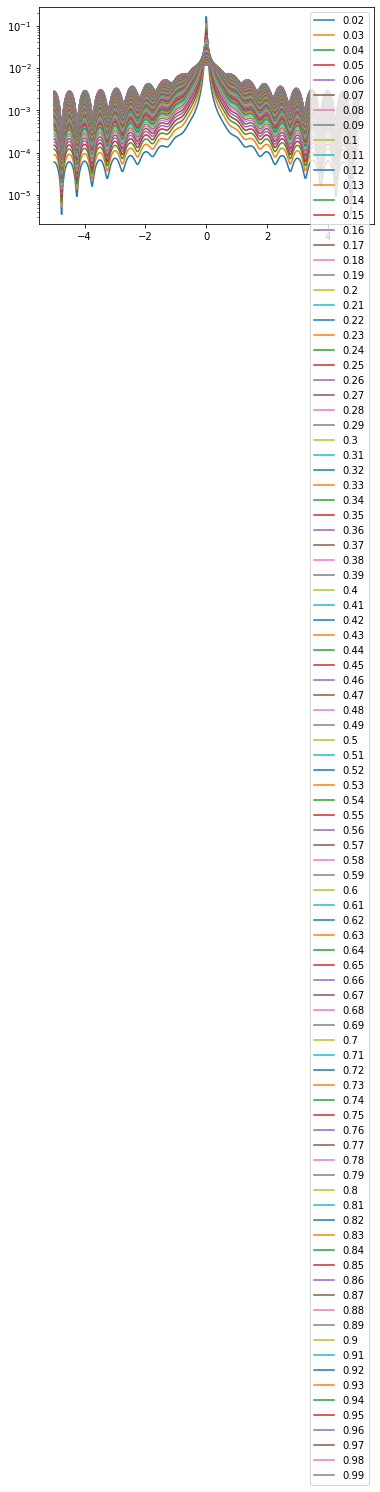

In [9]:
k=2*np.pi/wlen;   # wavenumber in vacuum
kz=np.sqrt(k**2-kx**2+0j) # Array of kz
zz=np.arange(0.02,1,0.01); # range of propagation with step increment
SIGz=np.zeros((len(zz),len(x)), dtype=complex)

for step in range(len(zz)): # forward propagation steps (arbitrary) in x unit
    z=zz[step]
    H=np.exp(1j*kz*z)       # propagation function, since kz is an array, H is also an arra
    TFz=TF*H;
    SIGz[step,:]=np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(TFz))); # <=use if choice (3)
    plt.plot(x,abs(SIGz[step,:]),label=str(round(z,3))) 
    plt.yscale("log")

plt.legend()

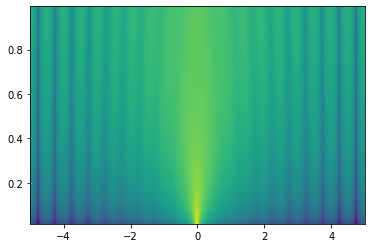

In [10]:
plt.pcolor(x,zz,np.log(abs(SIGz)))

In [11]:
kz

array([0.+314.09642722j, 0.+313.46798274j, 0.+312.83953775j, ...,
       0.+312.83953775j, 0.+313.46798274j, 0.+314.09642722j])

In [23]:
d=2.5
int(str(d))


ValueError: invalid literal for int() with base 10: '2.5'